# Exploratory Data Analysis

In [2]:
%pip install matplotlib seaborn pandas numpy statsmodels


Note: you may need to restart the kernel to use updated packages.


## Step 0: Imports and reading data

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')

In [4]:
df = pd.read_csv("Data/Preprocessed Data/final_data.csv")

## Step 1: Data understanding

In [5]:
df.head()

,Year,Month,station_name,elevation,humidity,TMPMAX,TMPMIN,precipitation,wind_speed_8_30am,wind_speed_17_30pm,patients,Date
0,2007,4,Batticaloa,8,90.100000,31.2,25.1,233.300000,1.9,5.8,12.0,2007-04-01
1,2007,4,Colombo,7,91.433333,31.7,24.8,374.100007,1.9,5.0,35.0,2007-04-01
2,2007,4,Galle,12,92.233333,30.8,24.9,342.799994,4.1,6.9,1.0,2007-04-01
3,2007,4,Gampaha,8,93.900000,31.8,24.3,249.899997,3.5,7.7,16.0,2007-04-01
4,2007,4,Jaffna,3,NaN,33.8,25.5,39.000000,5.4,8.0,0.0,2007-04-01


In [6]:
df.shape

(1836, 12)

In [7]:
df.columns

Index(['Year', 'Month', 'station_name', 'elevation', 'humidity', 'TMPMAX',
       'TMPMIN', 'precipitation', 'wind_speed_8_30am', 'wind_speed_17_30pm',
       'patients', 'Date'],
      dtype='object')

In [8]:
df.dtypes

Year                    int64
Month                   int64
station_name           object
elevation               int64
humidity              float64
TMPMAX                float64
TMPMIN                float64
precipitation         float64
wind_speed_8_30am     float64
wind_speed_17_30pm    float64
patients              float64
Date                   object
dtype: object

In [9]:
df[['humidity', 'TMPMAX', 'TMPMIN', 'precipitation', 'wind_speed_8_30am', 'wind_speed_17_30pm', 'patients']].describe()

,humidity,TMPMAX,TMPMIN,precipitation,wind_speed_8_30am,wind_speed_17_30pm,patients
count,1776.000000,1812.000000,1799.000000,1829.000000,1632.00000,1628.000000,1836.000000
mean,82.704250,31.241943,24.054252,182.546802,4.34945,6.368114,264.153050
std,6.636490,1.631799,2.011826,172.397775,3.32337,3.622596,534.262548
min,36.250000,25.900000,0.000000,0.000000,0.00000,0.200000,0.000000
25%,79.350000,30.100000,22.800000,52.199999,1.70000,3.600000,42.000000
50%,83.279630,31.200000,24.200000,134.500000,3.50000,5.800000,114.000000
75%,86.900806,32.300000,25.600000,268.000001,5.92500,8.300000,270.250000
max,97.800000,36.700000,28.600000,1346.500005,17.80000,21.500000,10483.000000


## Step 2: Data Preperation

In [10]:
# Identifying duplicated columns
df.loc[df.duplicated(subset = ['Year', 'Month', 'station_name'])]

,Year,Month,station_name,elevation,humidity,TMPMAX,TMPMIN,precipitation,wind_speed_8_30am,wind_speed_17_30pm,patients,Date


In [11]:
# Identifying number of null values
df.isna().sum()

Year                    0
Month                   0
station_name            0
elevation               0
humidity               60
TMPMAX                 24
TMPMIN                 37
precipitation           7
wind_speed_8_30am     204
wind_speed_17_30pm    208
patients                0
Date                    0
dtype: int64

In [12]:
from sklearn.preprocessing import MinMaxScaler

columns_to_normalize = ['humidity', 'TMPMAX', 
                        'TMPMIN', 'precipitation', 'wind_speed_8_30am', 
                        'wind_speed_17_30pm', 'patients']

# Create a new DataFrame with the selected columns
df_normalized = df.copy()

# Normalize the selected columns
scaler = MinMaxScaler()
df_normalized[columns_to_normalize] = scaler.fit_transform(df_normalized[columns_to_normalize])

# Print the normalized DataFrame
df_normalized.head()


,Year,Month,station_name,elevation,humidity,TMPMAX,TMPMIN,precipitation,wind_speed_8_30am,wind_speed_17_30pm,patients,Date
0,2007,4,Batticaloa,8,0.874898,0.490741,0.877622,0.173264,0.106742,0.262911,0.001145,2007-04-01
1,2007,4,Colombo,7,0.896561,0.537037,0.867133,0.277831,0.106742,0.225352,0.003339,2007-04-01
2,2007,4,Galle,12,0.909559,0.453704,0.870629,0.254586,0.230337,0.314554,0.000095,2007-04-01
3,2007,4,Gampaha,8,0.936637,0.546296,0.849650,0.185592,0.196629,0.352113,0.001526,2007-04-01
4,2007,4,Jaffna,3,NaN,0.731481,0.891608,0.028964,0.303371,0.366197,0.000000,2007-04-01


In [13]:
# convert date into date64 datatype and check the types 
df_normalized['Date'] = pd.to_datetime(df_normalized['Date']).dt.normalize()
df_normalized.dtypes

Year                           int64
Month                          int64
station_name                  object
elevation                      int64
humidity                     float64
TMPMAX                       float64
TMPMIN                       float64
precipitation                float64
wind_speed_8_30am            float64
wind_speed_17_30pm           float64
patients                     float64
Date                  datetime64[ns]
dtype: object

In [14]:
process_df = df_normalized[['station_name', 'humidity', 'TMPMAX', 'TMPMIN', 'precipitation','wind_speed_8_30am','wind_speed_17_30pm', 'patients','Date']]
process_df.head()

,station_name,humidity,TMPMAX,TMPMIN,precipitation,wind_speed_8_30am,wind_speed_17_30pm,patients,Date
0,Batticaloa,0.874898,0.490741,0.877622,0.173264,0.106742,0.262911,0.001145,2007-04-01
1,Colombo,0.896561,0.537037,0.867133,0.277831,0.106742,0.225352,0.003339,2007-04-01
2,Galle,0.909559,0.453704,0.870629,0.254586,0.230337,0.314554,0.000095,2007-04-01
3,Gampaha,0.936637,0.546296,0.849650,0.185592,0.196629,0.352113,0.001526,2007-04-01
4,Jaffna,NaN,0.731481,0.891608,0.028964,0.303371,0.366197,0.000000,2007-04-01


## Step 3: Feature Understanding

## Step 4: Feature Relationships

### Year Vs Patient count (All districts)

In [15]:
print(df.columns)

Index(['Year', 'Month', 'station_name', 'elevation', 'humidity', 'TMPMAX',
       'TMPMIN', 'precipitation', 'wind_speed_8_30am', 'wind_speed_17_30pm',
       'patients', 'Date'],
      dtype='object')


In [16]:
# Grouping patient data by year and summing the patient counts
patient_grouped_by_year = df.groupby(['Year'])['patients'].sum().reset_index()
patient_grouped_by_year.head()

,Year,patients
0,2007,4355.0
1,2008,3546.0
2,2009,15630.0
3,2010,17060.0
4,2011,14862.0


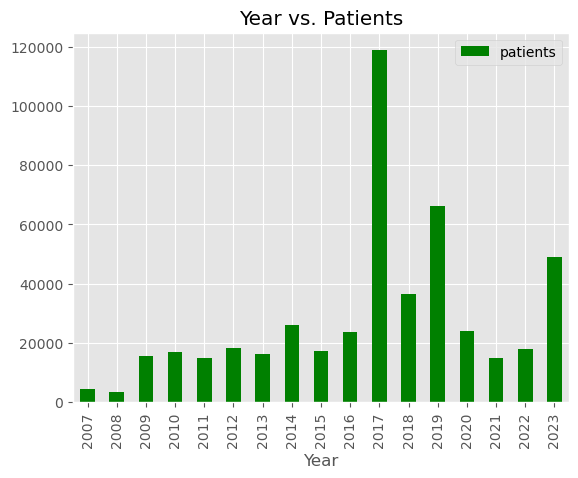

In [17]:
patient_grouped_by_year.plot(kind='bar',
                     x='Year',
                     y='patients',
                     title='Year vs. Patients',
                     color='green')
plt.show()

In [18]:
# Grouping patient data by year and station_name and summing the patient counts
patient_grouped_by_year_and_station = df.groupby(['Year', 'station_name'])['patients'].sum().reset_index()
print(patient_grouped_by_year_and_station.head())


   Year station_name  patients
0  2007   Batticaloa      66.0
1  2007      Colombo    1722.0
2  2007        Galle      89.0
3  2007      Gampaha     717.0
4  2007       Jaffna     112.0


In [19]:
grouped_patient_colombo_df = patient_grouped_by_year_and_station[patient_grouped_by_year_and_station.station_name == 'Colombo' ]
grouped_patient_colombo_df = grouped_patient_colombo_df.sort_values('Year').copy()

grouped_patient_gampaha_df = patient_grouped_by_year_and_station[patient_grouped_by_year_and_station.station_name == 'Gampaha' ]
grouped_patient_gampaha_df = grouped_patient_gampaha_df.sort_values('Year').copy()

grouped_patient_kandy_df = patient_grouped_by_year_and_station[patient_grouped_by_year_and_station.station_name == 'Kandy' ]
grouped_patient_kandy_df = grouped_patient_kandy_df.sort_values('Year').copy()

grouped_patient_galle_df = patient_grouped_by_year_and_station[patient_grouped_by_year_and_station.station_name == 'Galle' ]
grouped_patient_galle_df = grouped_patient_galle_df.sort_values('Year').copy()

grouped_patient_jaffna_df = patient_grouped_by_year_and_station[patient_grouped_by_year_and_station.station_name == 'Jaffna' ]
grouped_patient_jaffna_df = grouped_patient_jaffna_df.sort_values('Year').copy()

grouped_patient_kurunegala_df = patient_grouped_by_year_and_station[patient_grouped_by_year_and_station.station_name == 'Kurunegala' ]
grouped_patient_kurunegala_df = grouped_patient_kurunegala_df.sort_values('Year').copy()

grouped_patient_puttalam_df = patient_grouped_by_year_and_station[patient_grouped_by_year_and_station.station_name == 'Puttalam' ]
grouped_patient_puttalam_df = grouped_patient_puttalam_df.sort_values('Year').copy()

grouped_patient_ratnapura_df = patient_grouped_by_year_and_station[patient_grouped_by_year_and_station.station_name == 'Ratnapura' ]
grouped_patient_ratnapura_df = grouped_patient_ratnapura_df.sort_values('Year').copy()

grouped_patient_batticaloa_df = patient_grouped_by_year_and_station[patient_grouped_by_year_and_station.station_name == 'Batticaloa' ]
grouped_patient_batticaloa_df = grouped_patient_batticaloa_df.sort_values('Year').copy()

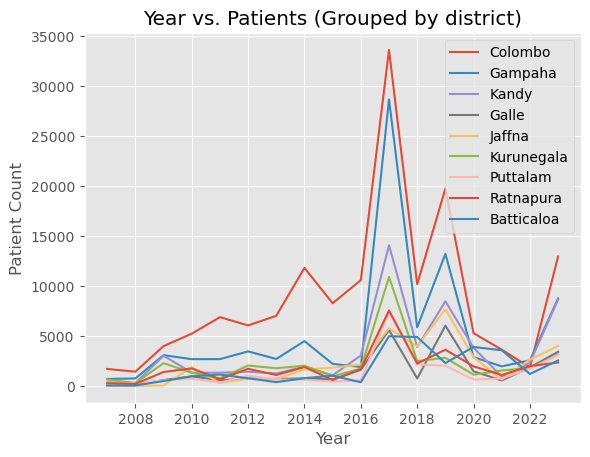

In [20]:
plt.plot(grouped_patient_colombo_df['Year'], grouped_patient_colombo_df['patients'], label='Colombo')
plt.plot(grouped_patient_gampaha_df['Year'], grouped_patient_gampaha_df['patients'], label='Gampaha')
plt.plot(grouped_patient_kandy_df['Year'], grouped_patient_kandy_df['patients'], label='Kandy')
plt.plot(grouped_patient_galle_df['Year'], grouped_patient_galle_df['patients'], label='Galle')
plt.plot(grouped_patient_jaffna_df['Year'], grouped_patient_jaffna_df['patients'], label='Jaffna')
plt.plot(grouped_patient_kurunegala_df['Year'], grouped_patient_kurunegala_df['patients'], label='Kurunegala')
plt.plot(grouped_patient_puttalam_df['Year'], grouped_patient_puttalam_df['patients'], label='Puttalam')
plt.plot(grouped_patient_ratnapura_df['Year'], grouped_patient_ratnapura_df['patients'], label='Ratnapura')
plt.plot(grouped_patient_batticaloa_df['Year'], grouped_patient_batticaloa_df['patients'], label='Batticaloa')
plt.xlabel('Year')     
plt.ylabel('Patient Count')     
plt.title('Year vs. Patients (Grouped by district)')   
plt.legend(loc= 'upper right') 

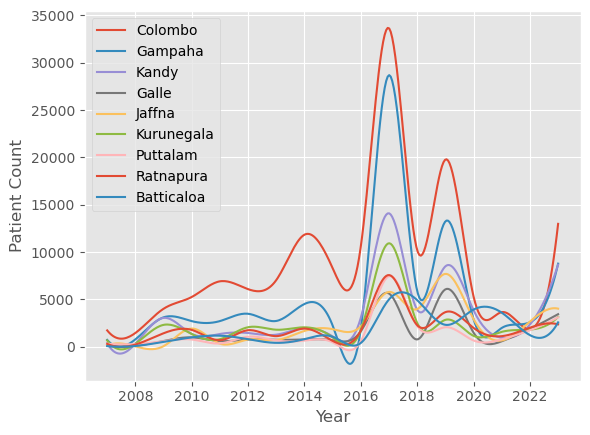

In [21]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline

# Define a function to create smooth curves
def create_smooth_curve(x, y, num_points=300):
    x_new = np.linspace(x.min(), x.max(), num_points)
    spl = make_interp_spline(x, y, k=3)  # k=3 means cubic spline
    y_smooth = spl(x_new)
    return x_new, y_smooth

# Generate smooth curves for each district
x_colombo, y_colombo = create_smooth_curve(grouped_patient_colombo_df['Year'], grouped_patient_colombo_df['patients'])
x_gampaha, y_gampaha = create_smooth_curve(grouped_patient_gampaha_df['Year'], grouped_patient_gampaha_df['patients'])
x_kandy, y_kandy = create_smooth_curve(grouped_patient_kandy_df['Year'], grouped_patient_kandy_df['patients'])
x_galle, y_galle = create_smooth_curve(grouped_patient_galle_df['Year'], grouped_patient_galle_df['patients'])
x_jaffna, y_jaffna = create_smooth_curve(grouped_patient_jaffna_df['Year'], grouped_patient_jaffna_df['patients'])
x_kurunegala, y_kurunegala = create_smooth_curve(grouped_patient_kurunegala_df['Year'], grouped_patient_kurunegala_df['patients'])
x_puttalam, y_puttalam = create_smooth_curve(grouped_patient_puttalam_df['Year'], grouped_patient_puttalam_df['patients'])
x_ratnapura, y_ratnapura = create_smooth_curve(grouped_patient_ratnapura_df['Year'], grouped_patient_ratnapura_df['patients'])
x_batticaloa, y_batticaloa = create_smooth_curve(grouped_patient_batticaloa_df['Year'], grouped_patient_batticaloa_df['patients'])

# Plot the smooth curves
plt.plot(x_colombo, y_colombo, label='Colombo')
plt.plot(x_gampaha, y_gampaha, label='Gampaha')
plt.plot(x_kandy, y_kandy, label='Kandy')
plt.plot(x_galle, y_galle, label='Galle')
plt.plot(x_jaffna, y_jaffna, label='Jaffna')
plt.plot(x_kurunegala, y_kurunegala, label='Kurunegala')
plt.plot(x_puttalam, y_puttalam, label='Puttalam')
plt.plot(x_ratnapura, y_ratnapura, label='Ratnapura')
plt.plot(x_batticaloa, y_batticaloa, label='Batticaloa')

plt.xlabel('Year')
plt.ylabel('Patient Count')
# plt.title('Year vs. Patients (Grouped by district)')
plt.legend(loc='upper left')

plt.show()


### Year Vs Patient count (Patient count for each year for each districts)

In [22]:
process_df.station_name.unique()

array(['Batticaloa', 'Colombo', 'Galle', 'Gampaha', 'Jaffna', 'Kandy',
       'Kurunegala', 'Puttalam', 'Ratnapura'], dtype=object)

In [23]:
Colombo_df = process_df[process_df.station_name == 'Colombo' ]
Colombo_df = Colombo_df.sort_values('Date').copy()
Colombo_df.shape

(204, 9)

In [24]:
Gampaha_df = process_df[process_df.station_name == 'Gampaha' ]
Gampaha_df = Gampaha_df.sort_values('Date').copy()

In [25]:
Kandy_df = process_df[process_df.station_name == 'Kandy' ]
Kandy_df = Kandy_df.sort_values('Date').copy()

In [26]:
Galle_df = process_df[process_df.station_name == 'Galle' ]
Galle_df = Galle_df.sort_values('Date').copy()

In [27]:
Jaffna_df = process_df[process_df.station_name == 'Jaffna' ]
Jaffna_df = Jaffna_df.sort_values('Date').copy()

In [28]:
Kurunegala_df = process_df[process_df.station_name == 'Kurunegala' ]
Kurunegala_df = Kurunegala_df.sort_values('Date').copy()

In [29]:
Puttalam_df = process_df[process_df.station_name == 'Puttalam' ]
Puttalam_df = Puttalam_df.sort_values('Date').copy()

In [30]:
Ratnapura_df = process_df[process_df.station_name == 'Ratnapura' ]
Ratnapura_df = Ratnapura_df.sort_values('Date').copy()

In [31]:
Batticaloa_df = process_df[process_df.station_name == 'Batticaloa' ]
Batticaloa_df = Batticaloa_df.sort_values('Date').copy()

#### Colombo and Gampaha Analysis 

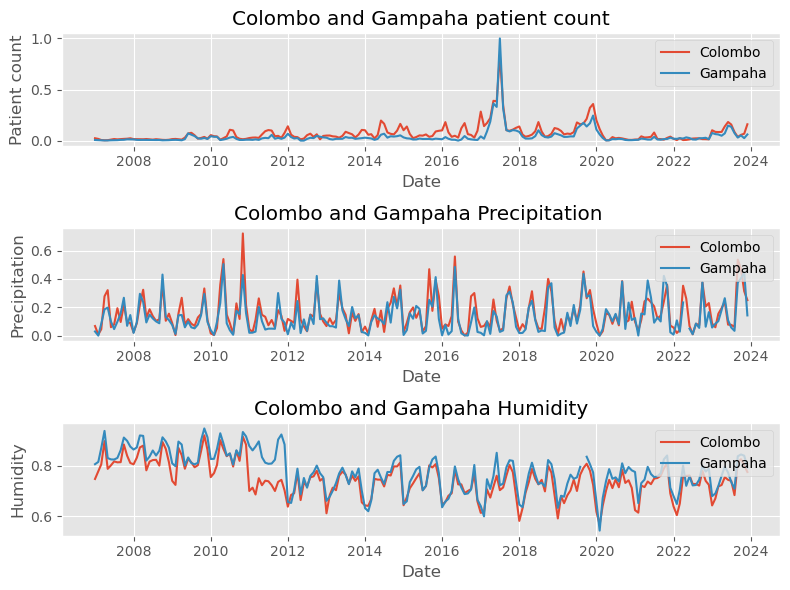

In [32]:
plt.figure(figsize=(8, 6))

plt.subplot(3,1,1)
plt.plot(Colombo_df['Date'], Colombo_df['patients'], label='Colombo')
plt.plot(Gampaha_df['Date'], Gampaha_df['patients'], label='Gampaha')
plt.xlabel('Date')     
plt.ylabel('Patient count')     
plt.title('Colombo and Gampaha patient count')   
plt.legend(loc= 'upper right')

plt.subplot(3,1,2)
plt.plot(Colombo_df['Date'], Colombo_df['precipitation'], label='Colombo')
plt.plot(Gampaha_df['Date'], Gampaha_df['precipitation'], label='Gampaha')
plt.xlabel('Date')    
plt.ylabel('Precipitation')     
plt.title('Colombo and Gampaha Precipitation ')   
plt.legend(loc= 'upper right')

plt.subplot(3,1,3)
plt.plot(Colombo_df['Date'], Colombo_df['humidity'], label='Colombo')
plt.plot(Gampaha_df['Date'], Gampaha_df['humidity'], label='Gampaha')
plt.xlabel('Date')    
plt.ylabel('Humidity')     
plt.title('Colombo and Gampaha Humidity')   
plt.legend(loc= 'upper right')

# Automatically adjust subplot parameters for clear layout
plt.tight_layout()
plt.show()

#### Precipitation backtracking

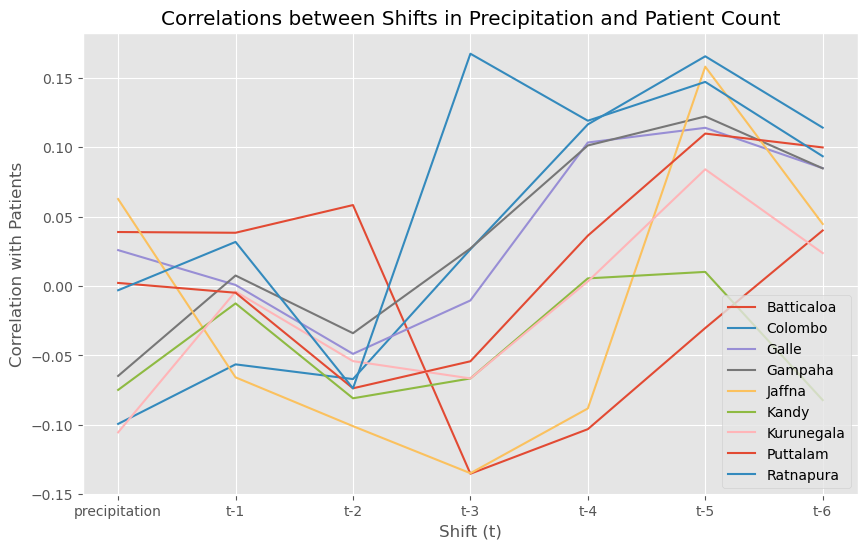

In [33]:

import warnings
warnings.simplefilter(action='ignore', category=pd.errors.SettingWithCopyWarning)

all_precipation_corr = process_df[['patients','precipitation']]

corr_list = []
plt.figure(figsize=(10, 6))

# List of shifts for x-axis labels
shift_labels = ['precipitation','t-1', 't-2', 't-3', 't-4', 't-5', 't-6']

for district in process_df.station_name.unique():
# for district in ['Jaffna','Batticaloa']:
    district_df = process_df[process_df.station_name == district]

    precipation_corr = district_df[['patients','precipitation']]

    precipation_corr['t-1'] = precipation_corr['precipitation'].shift(-1)
    precipation_corr['t-2'] = precipation_corr['precipitation'].shift(-2)
    precipation_corr['t-3'] = precipation_corr['precipitation'].shift(-3)
    precipation_corr['t-4'] = precipation_corr['precipitation'].shift(-4)
    precipation_corr['t-5'] = precipation_corr['precipitation'].shift(-5)
    precipation_corr['t-6'] = precipation_corr['precipitation'].shift(-6)

    precipation_corr.dropna(inplace=True)

    corr = (precipation_corr.corr()).drop('patients', axis=0)['patients']
    corr_list.append(corr)
    plt.plot(shift_labels, corr.values, label=district)

# Add labels and legend
plt.xlabel('Shift (t)')
plt.ylabel('Correlation with Patients')
plt.title('Correlations between Shifts in Precipitation and Patient Count')
plt.legend()
plt.show()

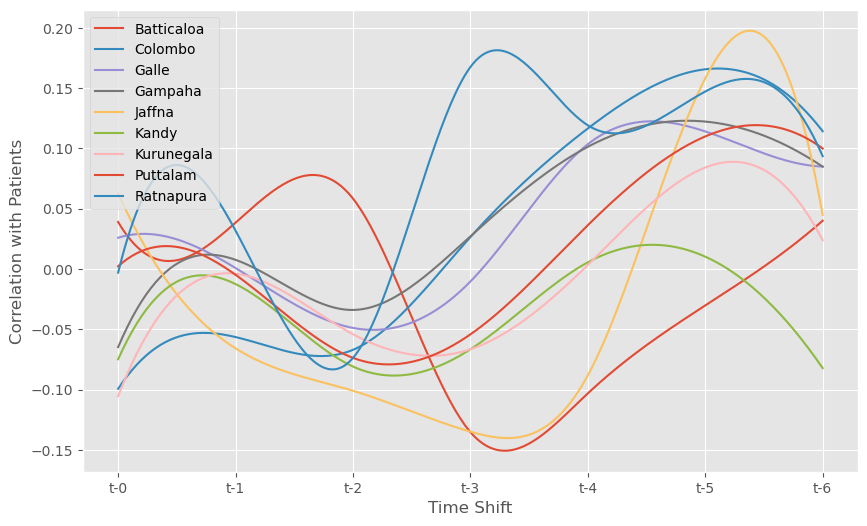

In [34]:
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline

warnings.simplefilter(action='ignore', category=pd.errors.SettingWithCopyWarning)

# Example data setup (replace with your actual data)
# process_df = pd.read_csv('your_data.csv')

all_precipation_corr = process_df[['patients', 'precipitation']]

corr_list = []
plt.figure(figsize=(10, 6))

# List of shifts for x-axis labels
shift_labels = ['t-0', 't-1', 't-2', 't-3', 't-4', 't-5', 't-6']
shifts = np.arange(len(shift_labels))

for district in process_df.station_name.unique():
    district_df = process_df[process_df.station_name == district]

    precipation_corr = district_df[['patients', 'precipitation']]

    for i in range(1, 7):
        precipation_corr[f't-{i}'] = precipation_corr['precipitation'].shift(-i)

    precipation_corr.dropna(inplace=True)

    corr = (precipation_corr.corr()).drop('patients', axis=0)['patients']
    corr_list.append(corr)

    # Create smooth curve using spline interpolation
    x_new = np.linspace(shifts.min(), shifts.max(), 300)
    spl = make_interp_spline(shifts, corr.values, k=3)  # k=3 for cubic spline
    y_smooth = spl(x_new)

    plt.plot(x_new, y_smooth, label=district)

# Add labels and legend
plt.xticks(ticks=shifts, labels=shift_labels)
plt.xlabel('Time Shift')
plt.ylabel('Correlation with Patients')
# plt.title('Correlations between Shifts in Precipitation and Patient Count')
plt.legend()
plt.show()


#### Humitidy Backtracking

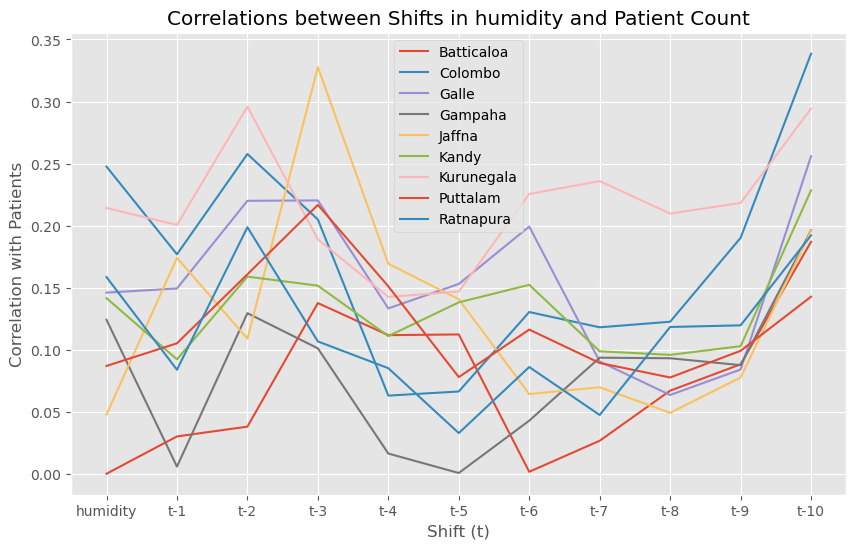

In [35]:

import warnings
warnings.simplefilter(action='ignore', category=pd.errors.SettingWithCopyWarning)

corr_list = []
plt.figure(figsize=(10, 6))

# List of shifts for x-axis labels
shift_labels = ['humidity','t-1', 't-2', 't-3', 't-4', 't-5', 't-6','t-7','t-8','t-9','t-10']

for district in process_df.station_name.unique():
    district_df = process_df[process_df.station_name == district]

    precipation_corr = district_df[['patients','humidity']]

    precipation_corr['t-1'] = precipation_corr['humidity'].shift(-1)
    precipation_corr['t-2'] = precipation_corr['humidity'].shift(-2)
    precipation_corr['t-3'] = precipation_corr['humidity'].shift(-3)
    precipation_corr['t-4'] = precipation_corr['humidity'].shift(-4)
    precipation_corr['t-5'] = precipation_corr['humidity'].shift(-5)
    precipation_corr['t-6'] = precipation_corr['humidity'].shift(-6)
    precipation_corr['t-7'] = precipation_corr['humidity'].shift(-7)
    precipation_corr['t-8'] = precipation_corr['humidity'].shift(-8)
    precipation_corr['t-9'] = precipation_corr['humidity'].shift(-9)
    precipation_corr['t-10'] = precipation_corr['humidity'].shift(-10)

    precipation_corr.dropna(inplace=True)

    corr = (precipation_corr.corr()).drop('patients', axis=0)['patients'].abs()
    corr_list.append(corr)
    plt.plot(shift_labels, corr.values, label=district)

# Add labels and legend
plt.xlabel('Shift (t)')
plt.ylabel('Correlation with Patients')
plt.title('Correlations between Shifts in humidity and Patient Count')
plt.legend()
plt.show()

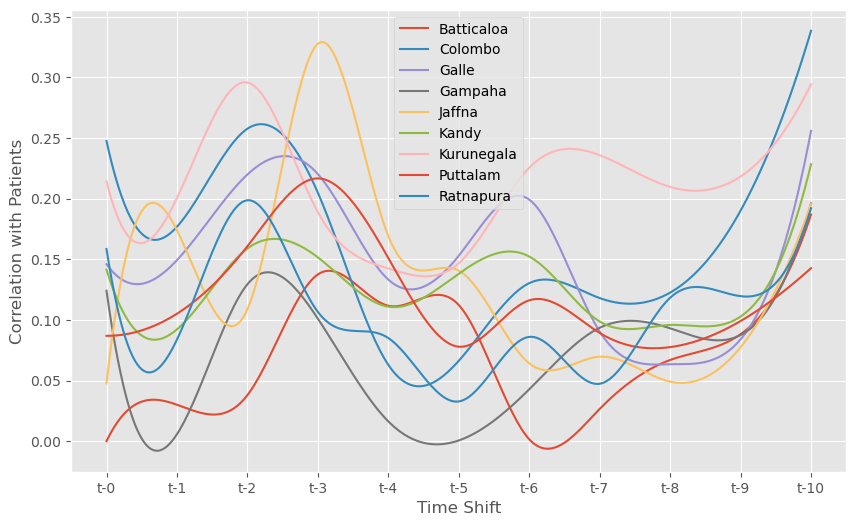

In [36]:
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline

warnings.simplefilter(action='ignore', category=pd.errors.SettingWithCopyWarning)

corr_list = []
plt.figure(figsize=(10, 6))

# List of shifts for x-axis labels
shift_labels = ['t-0', 't-1', 't-2', 't-3', 't-4', 't-5', 't-6', 't-7', 't-8', 't-9', 't-10']
shifts = np.arange(len(shift_labels))

for district in process_df.station_name.unique():
    district_df = process_df[process_df.station_name == district]

    humidity_corr = district_df[['patients', 'humidity']]

    for i in range(1, 11):
        humidity_corr[f't-{i}'] = humidity_corr['humidity'].shift(-i)

    humidity_corr.dropna(inplace=True)

    corr = (humidity_corr.corr()).drop('patients', axis=0)['patients'].abs()
    corr_list.append(corr)

    # Create smooth curve using spline interpolation
    x_new = np.linspace(shifts.min(), shifts.max(), 300)
    spl = make_interp_spline(shifts, corr.values, k=3)  # k=3 for cubic spline
    y_smooth = spl(x_new)

    plt.plot(x_new, y_smooth, label=district)

# Add labels and legend
plt.xticks(ticks=shifts, labels=shift_labels)
plt.xlabel('Time Shift')
plt.ylabel('Correlation with Patients')
# plt.title('Correlations between Shifts in Humidity and Patient Count')
plt.legend()
plt.show()


#### Kandy and Kurunegala Analysis

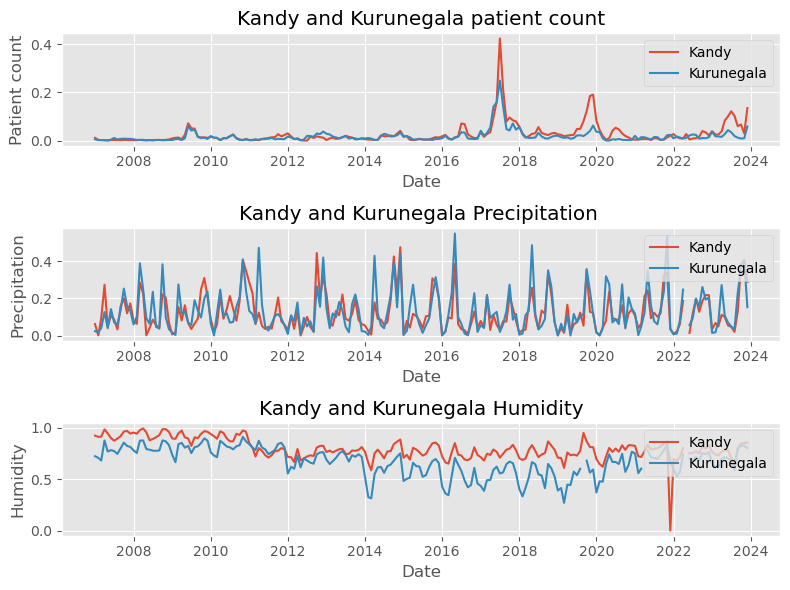

In [37]:
plt.figure(figsize=(8, 6))

plt.subplot(3,1,1)
plt.plot(Kandy_df['Date'], Kandy_df['patients'], label='Kandy')
plt.plot(Kurunegala_df['Date'], Kurunegala_df['patients'], label='Kurunegala')
plt.xlabel('Date')     
plt.ylabel('Patient count')     
plt.title('Kandy and Kurunegala patient count')   
plt.legend(loc= 'upper right')

plt.subplot(3,1,2)
plt.plot(Kandy_df['Date'], Kandy_df['precipitation'], label='Kandy')
plt.plot(Kurunegala_df['Date'], Kurunegala_df['precipitation'], label='Kurunegala')
plt.xlabel('Date')     
plt.ylabel('Precipitation')     
plt.title('Kandy and Kurunegala Precipitation ')   
plt.legend(loc= 'upper right')


plt.subplot(3,1,3)
plt.plot(Kandy_df['Date'], Kandy_df['humidity'], label='Kandy')
plt.plot(Kurunegala_df['Date'], Kurunegala_df['humidity'], label='Kurunegala')
plt.xlabel('Date')     
plt.ylabel('Humidity')     
plt.title('Kandy and Kurunegala Humidity')   
plt.legend(loc= 'upper right')

# Automatically adjust subplot parameters for clear layout
plt.tight_layout()
plt.show()

#### Galle, Jaffna,Ratnapura, Puttalam  Batticaloa  Analysis

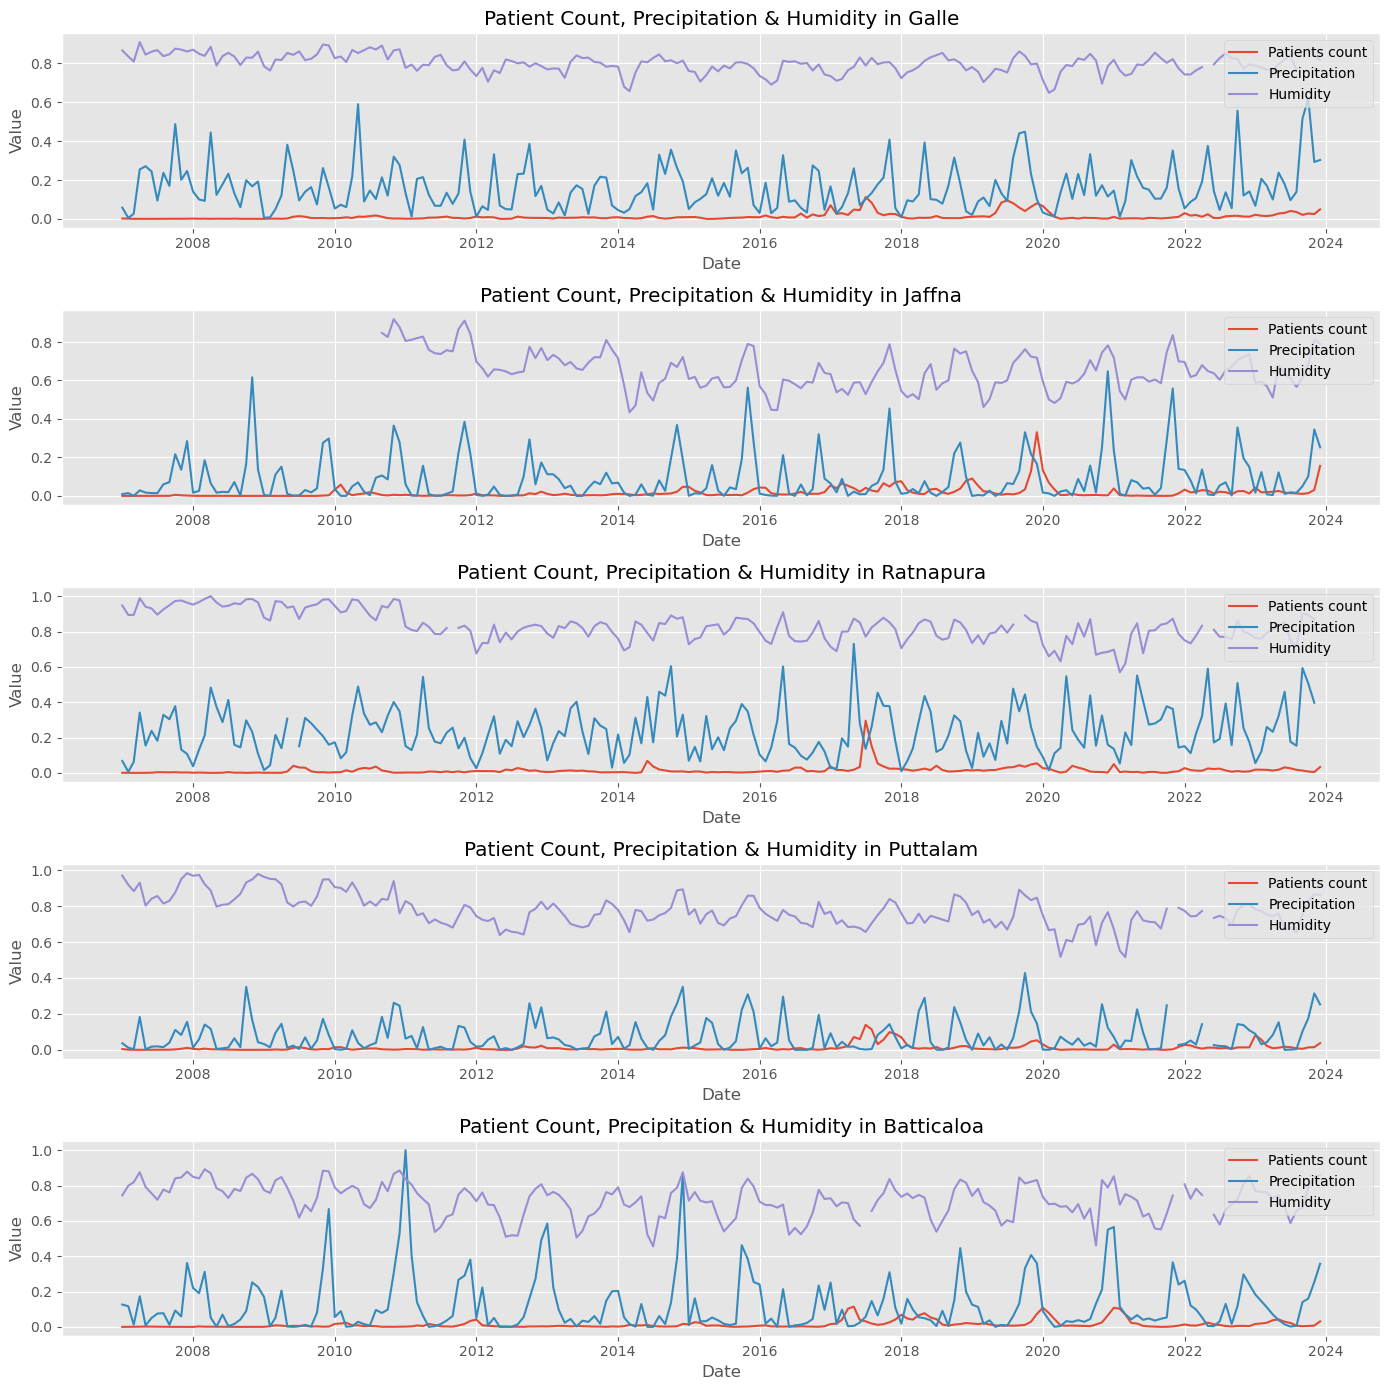

In [38]:
plt.figure(figsize=(14, 14))

plt.subplot(5,1,1)
plt.plot(Galle_df['Date'], Galle_df['patients'], label = 'Patients count')
plt.plot(Galle_df['Date'], Galle_df['precipitation'], label = 'Precipitation')
plt.plot(Galle_df['Date'], Galle_df['humidity'], label = 'Humidity')
plt.xlabel('Date')     
plt.ylabel('Value')     
plt.title('Patient Count, Precipitation & Humidity in Galle')   
plt.legend(loc= 'upper right')   

plt.subplot(5,1,2)
plt.plot(Jaffna_df['Date'], Jaffna_df['patients'], label = 'Patients count')
plt.plot(Jaffna_df['Date'], Jaffna_df['precipitation'], label = 'Precipitation')
plt.plot(Jaffna_df['Date'], Jaffna_df['humidity'], label = 'Humidity')
plt.xlabel('Date')     
plt.ylabel('Value')     
plt.title('Patient Count, Precipitation & Humidity in Jaffna')   
plt.legend(loc= 'upper right')   

plt.subplot(5,1,3)
plt.plot(Ratnapura_df['Date'], Ratnapura_df['patients'], label = 'Patients count')
plt.plot(Ratnapura_df['Date'], Ratnapura_df['precipitation'], label = 'Precipitation')
plt.plot(Ratnapura_df['Date'], Ratnapura_df['humidity'], label = 'Humidity')
plt.xlabel('Date')     
plt.ylabel('Value')     
plt.title('Patient Count, Precipitation & Humidity in Ratnapura')   
plt.legend(loc= 'upper right')

plt.subplot(5,1,4)
plt.plot(Puttalam_df['Date'], Puttalam_df['patients'], label = 'Patients count')
plt.plot(Puttalam_df['Date'], Puttalam_df['precipitation'], label = 'Precipitation')
plt.plot(Puttalam_df['Date'], Puttalam_df['humidity'], label = 'Humidity')
plt.xlabel('Date')     
plt.ylabel('Value')     
plt.title('Patient Count, Precipitation & Humidity in Puttalam')   
plt.legend(loc= 'upper right')

plt.subplot(5,1,5)
plt.plot(Batticaloa_df['Date'], Batticaloa_df['patients'], label = 'Patients count')
plt.plot(Batticaloa_df['Date'], Batticaloa_df['precipitation'], label = 'Precipitation')
plt.plot(Batticaloa_df['Date'], Batticaloa_df['humidity'], label = 'Humidity')
plt.xlabel('Date')     
plt.ylabel('Value')     
plt.title('Patient Count, Precipitation & Humidity in Batticaloa')   
plt.legend(loc= 'upper right')

plt.tight_layout()
plt.show()

#### Heatmap Correlation

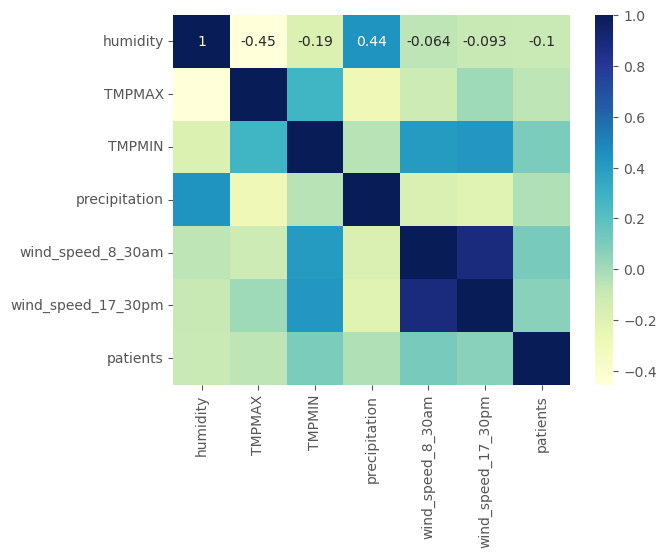

In [39]:
df_correlation = process_df[['humidity', 'TMPMAX',
       'TMPMIN', 'precipitation', 'wind_speed_8_30am', 'wind_speed_17_30pm',
       'patients']].dropna().corr()

# plotting correlation heatmap 
dataplot = sns.heatmap(df_correlation, cmap="YlGnBu", annot=True)

plt.show()

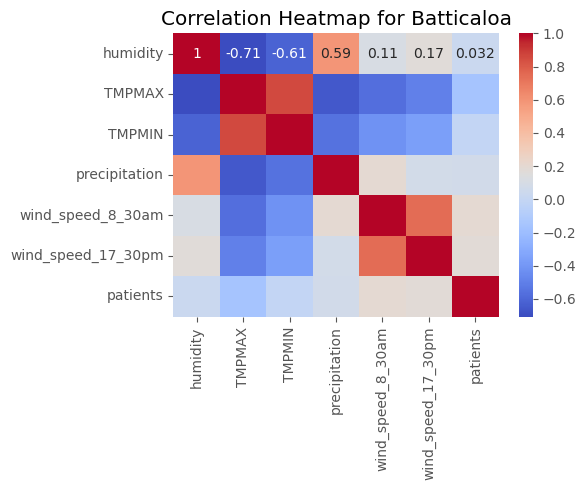

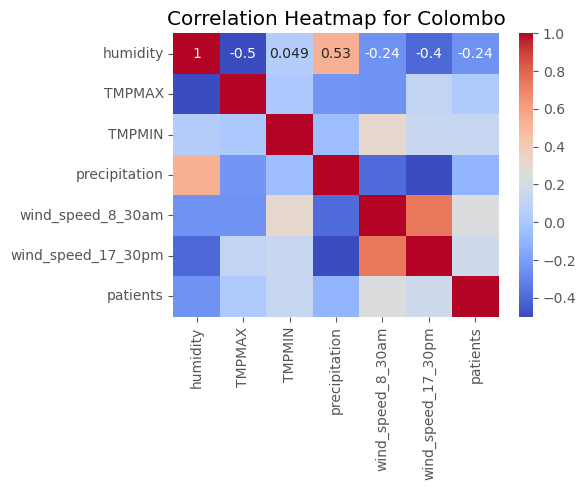

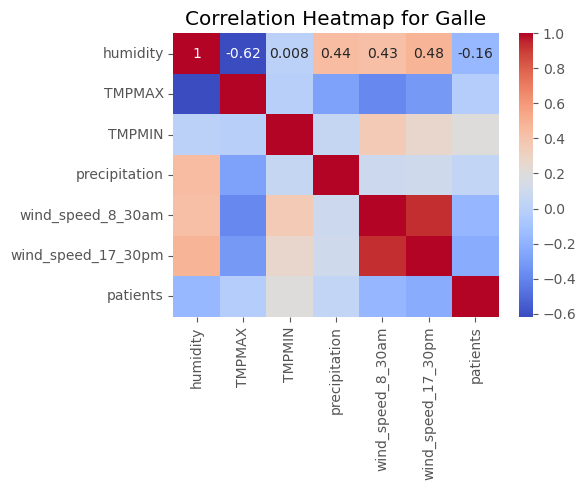

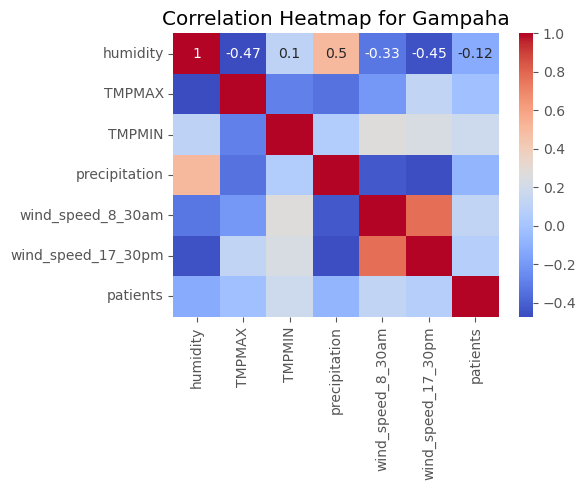

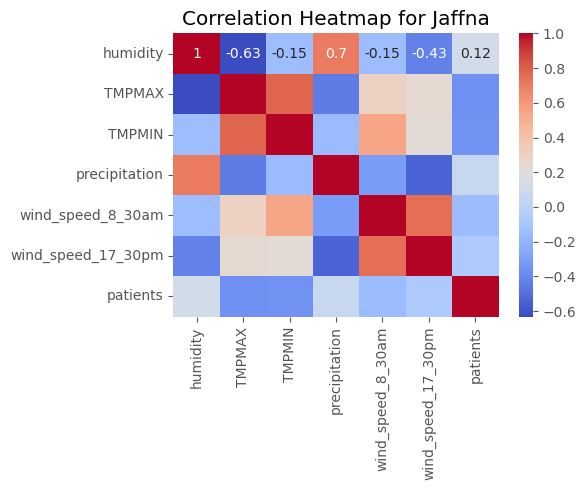

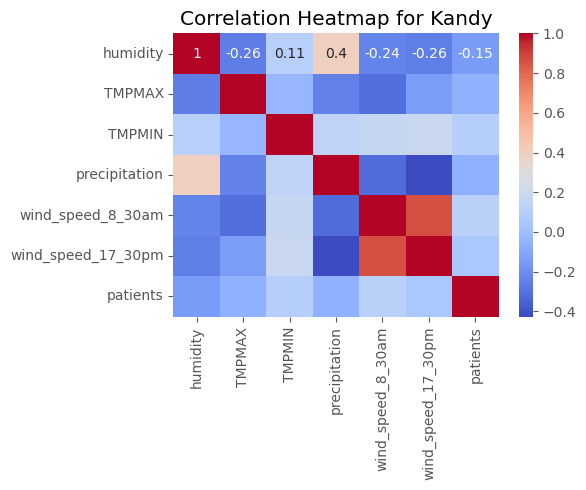

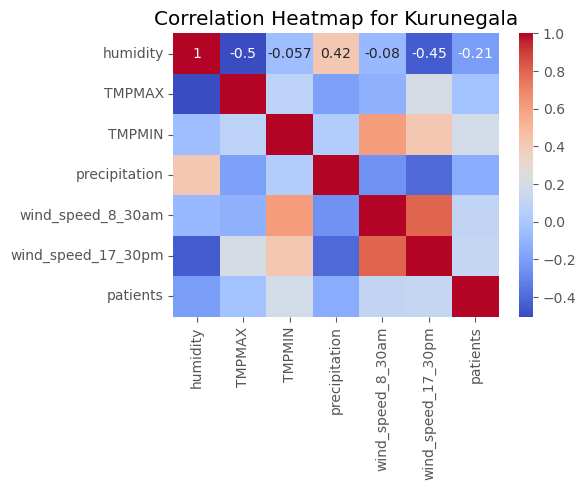

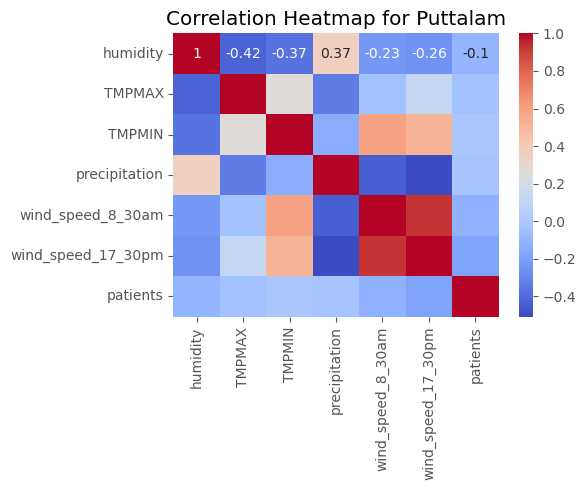

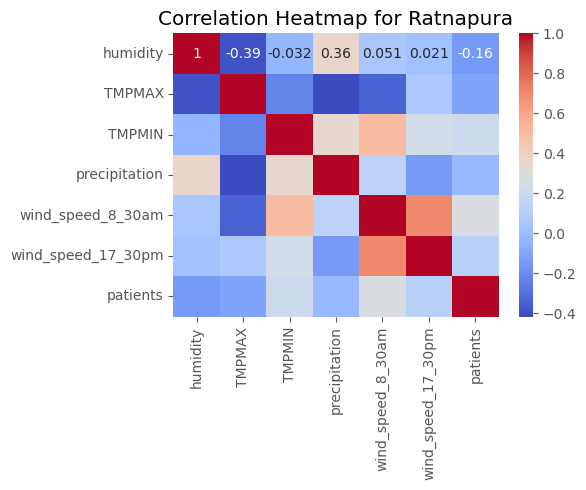

In [40]:
# Loop through each district and plot a heatmap on a separate figure
for district in process_df.station_name.unique():
    # Get the DataFrame for the current district
    district_df = process_df[process_df.station_name == district]
    
    # Calculate the correlation for the relevant columns, excluding NaN rows
    corr_df = district_df[['humidity', 'TMPMAX', 'TMPMIN', 'precipitation', 'wind_speed_8_30am', 'wind_speed_17_30pm', 'patients']].dropna().corr()

    # Create a new figure for each heatmap
    plt.figure(figsize=(6, 5))  # Set the figure size for individual plots
    
    # Plot the heatmap
    sns.heatmap(corr_df, annot=True, cmap='coolwarm', cbar=True)
    
    # Set the title for the heatmap
    plt.title(f"Correlation Heatmap for {district}")

    # Show the plot
    plt.tight_layout()  # Adjust layout
    plt.show()